In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.stats import shapiro, ttest_ind, spearmanr, chi2_contingency
from sklearn.datasets import load_wine, make_classification
import warnings
warnings.filterwarnings("ignore")

In [60]:
wine = load_wine()

In [61]:
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [62]:
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df["target"] = wine.target

In [63]:
data, target = make_classification(n_samples=400, n_features=5, n_classes=2)

In [64]:
df = pd.DataFrame(data, columns=[f"feature{i}" for i in range(1,6)])
df["target"] = target

In [65]:
wine = wine_df.copy()

In [21]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [22]:
df.head()

,feature1,feature2,feature3,feature4,feature5,target
0,-2.037466,0.584354,-1.107503,0.949907,-0.382252,1
1,0.706075,0.504009,-1.099452,-1.183698,0.208479,0
2,1.379702,-2.174433,0.123639,1.508084,0.067481,1
3,-1.984264,1.669680,0.860524,-0.406027,-0.253863,0
4,-1.557828,1.796685,-2.494945,-0.906371,-0.147037,0


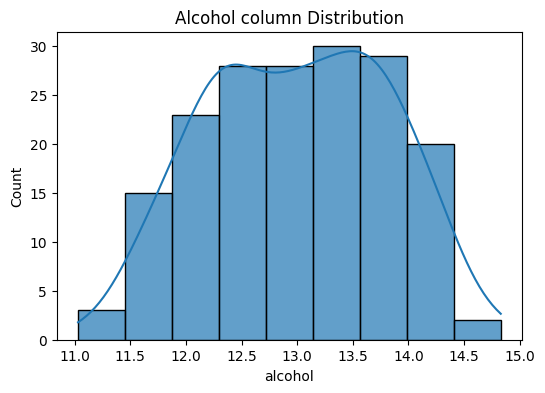

In [26]:
plt.figure(figsize=(6,4))
plt.title("Alcohol column Distribution")
sns.histplot(wine["alcohol"], kde=True, alpha=0.7)
plt.show()

In [27]:
# H0 -> Data is normally distibuted
# Ha -> Data is not normally distibuted

# Checking weather to accept the null hypothesis or reject it.
sh_stat, sh_p = shapiro(wine["alcohol"])

print("shapiro Statistical Value : ", sh_stat)
print("Shapiro p_value:", sh_p)

alpha = 0.05
if sh_p > alpha:
    print("Data is normally distributed (Acepting H0)")
else:
    print("Data is not normally distributed (Rejecting H0)")
    

shapiro Statistical Value :  0.981804609298706
Shapiro p_value: 0.020050711929798126
Data is not normally distributed (Rejecting H0)


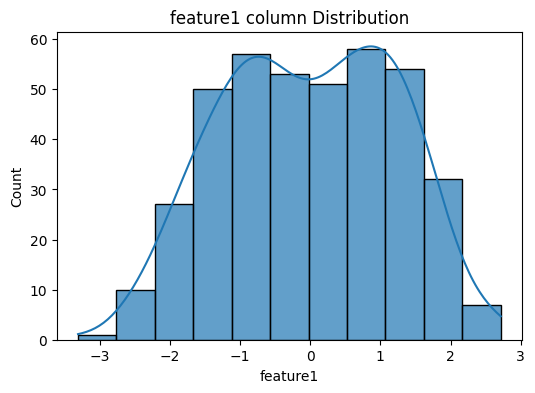

In [28]:
plt.figure(figsize=(6,4))
plt.title("feature1 column Distribution")
sns.histplot(df["feature1"], kde=True, alpha=0.7)
plt.show()

In [29]:
# H0 -> Data is normally distibuted
# Ha -> Data is not normally distibuted

# Checking weather to accept the null hypothesis or reject it.
sh_stat, sh_p = shapiro(df["feature1"])

print("shapiro Statistical Value : ", sh_stat)
print("Shapiro p_value:", sh_p)

alpha = 0.05
if sh_p > alpha:
    print("Data is normally distributed (Acepting H0)")
else:
    print("Data is not normally distributed (Rejecting H0)")

shapiro Statistical Value :  0.9825432300567627
Shapiro p_value: 9.373615466756746e-05
Data is not normally distributed (Rejecting H0)


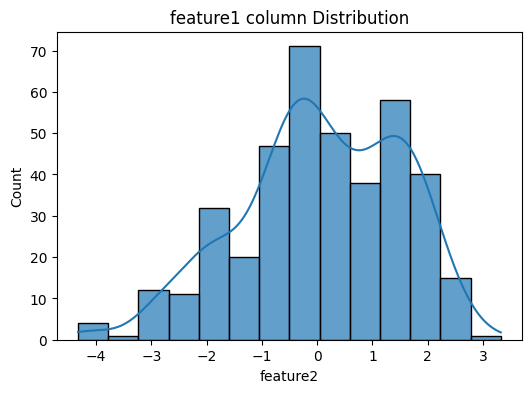

In [30]:
plt.figure(figsize=(6,4))
plt.title("feature1 column Distribution")
sns.histplot(df["feature2"], kde=True, alpha=0.7)
plt.show()

In [31]:
wine.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

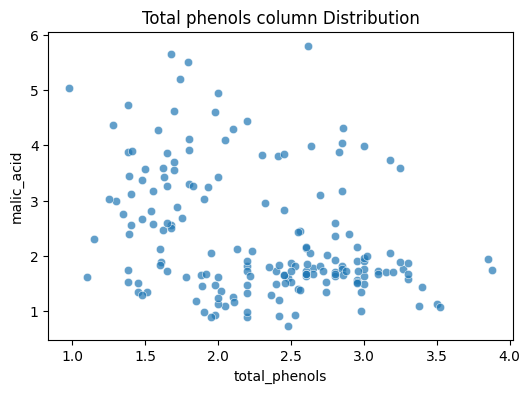

In [38]:
plt.figure(figsize=(6,4))
plt.title("Total phenols column Distribution")
sns.scatterplot(x=wine["total_phenols"], y=wine["malic_acid"], alpha=0.7)
plt.show()

In [41]:
# H0 --> total_phenol and malic_acid are independent
# Ha --> total_phenol and malic_acid are not independent
# Spearmanr
# Checking weather to accept the null hypothesis or reject it.
sh_stats, sp_p = spearmanr(wine["total_phenols"], wine["malic_acid"])
print("Spearmanr Statistical Value : %.5f" %sh_stat)
print("Spearmanr p_value:%.5f" %sp_p)

alpha = 0.05
if sp_p > alpha:
    print("total_phenol and malic_acid are independent (Acepting H0)")
else:
    print("total_phenol and malic_acid are not independent (Rejecting H0)")

Spearmanr Statistical Value : -0.28022
Spearmanr p_value:0.00015
total_phenol and malic_acid are not independent (Rejecting H0)


In [42]:
df.head()

,feature1,feature2,feature3,feature4,feature5,target
0,-2.037466,0.584354,-1.107503,0.949907,-0.382252,1
1,0.706075,0.504009,-1.099452,-1.183698,0.208479,0
2,1.379702,-2.174433,0.123639,1.508084,0.067481,1
3,-1.984264,1.669680,0.860524,-0.406027,-0.253863,0
4,-1.557828,1.796685,-2.494945,-0.906371,-0.147037,0


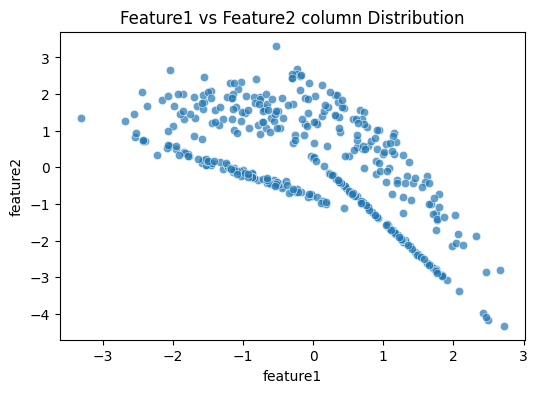

In [44]:
plt.figure(figsize=(6,4))
plt.title("Feature1 vs Feature2 column Distribution")
sns.scatterplot(x=df["feature1"], y=df["feature2"], alpha=0.7)
plt.show()

In [72]:
# H0 --> total_phenol and malic_acid are independent
# Ha --> total_phenol and malic_acid are not independent

# Spearmanr
# Checking weather to accept the null hypothesis or reject it.

sp_stat, sp_p = spearmanr(df["feature1"], df["feature2"])
print("Spearmanr Statistical Value : %.5f" %sp_stat)
print("Spearmanr p_value:%.5f" %sp_p)

alpha = 0.05
if sp_p > alpha:
    print("total_phenol and malic_acid are independent (Acepting H0)")
else:
    print("total_phenol and malic_acid are not independent (Rejecting H0)")

Spearmanr Statistical Value : 0.48149
Spearmanr p_value:0.00000
total_phenol and malic_acid are not independent (Rejecting H0)


In [66]:
# cut distributes / changes the value in columns from numerical to categorcial
cat = pd.cut(wine["proanthocyanins"], bins=4, labels = [0,1,2,3])
cat

0      2
1      1
2      3
3      2
4      1
      ..
173    0
174    1
175    1
176    1
177    1
Name: proanthocyanins, Length: 178, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [68]:
# Sequential = discreate
# Numerical = categorical

wine["proanthocyanins"]=cat
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,3,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1,4.32,1.04,2.93,735.0,0


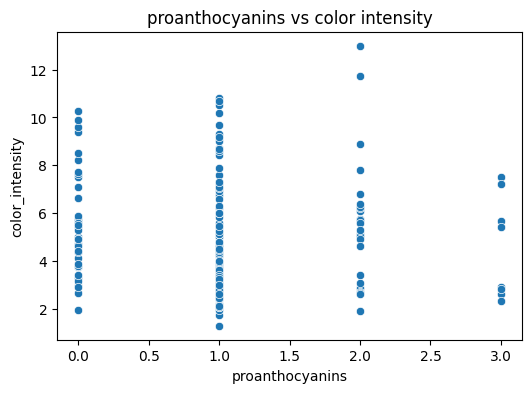

In [69]:
plt.figure(figsize=(6,4))
plt.title("proanthocyanins vs color intensity")
sns.scatterplot(x=wine["proanthocyanins"], y=wine["color_intensity"])
plt.show()

In [71]:
# H0 --> proanthocyanins and color intensity are independent
# Ha --> proanthocyanins and color intensity are dependent

# Spearmanr
# Checking weather to reject the null hypothesis

t_stats, t_p = ttest_ind(wine["proanthocyanins"], wine["color_intensity"])
print("t Statistical Value : %.5f" %t_stats)
print("p_value for t_test :", t_p)

alpha = 0.05
if t_p > alpha:
    print("proanthocyanins and color intensity are independent (Acepting H0)")
else:
    print("proanthocyanins and color intensity are dependent(Rejecting H0)")

t Statistical Value : -22.17444
p_value for t_test : 6.30632747343074e-69
proanthocyanins and color intensity are dependent(Rejecting H0)


In [74]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,3,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1,4.32,1.04,2.93,735.0,0


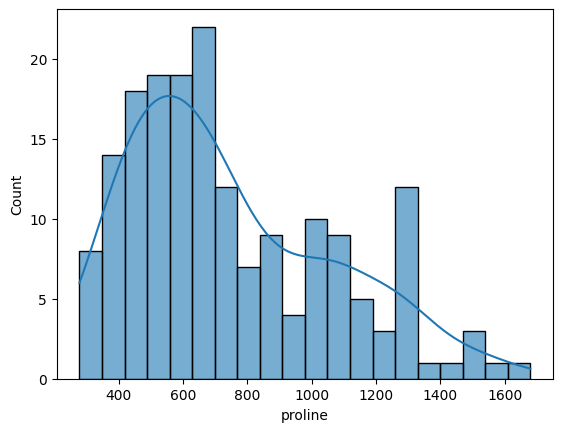

In [75]:
sns.histplot(x=wine["proline"], bins=20, alpha=0.6, legend=False, kde=True)
plt.show()

In [76]:
wine["proline"].mean()

746.8932584269663

In [77]:
sample1=np.random.choice(wine["proline"], size=34)
sample2=np.random.choice(wine["proline"], size=34)

In [81]:
# H0 --> Sample1 and Sample2 are not equal
# Ha --> Sample1 and Sample2 are equal

t_stats, t_p = ttest_ind(sample1, sample2)
print("t-test Statistical Value : %.5f"%t_stats)
print("t-test p value : %.5f" %t_p)

alpha = 0.05
if t_p > alpha:
    print("Sample1 and Sample2 are not equal (Acepting H0)")
else:
    print(" Sample1 and Sample2 are equal (Rejecting H0)") 


t-test Statistical Value : -0.98251
t-test p value : 0.32943
Sample1 and Sample2 are not equal (Acepting H0)


In [82]:
sample1.mean()

734.3235294117648

In [83]:
sample2.mean()

808.7058823529412

In [89]:
data = {
    "Gender":np.random.choice(["Male", "Female"], 80),
    "Subject":np.random.choice(["Med", "Eng"], 80)                      
}

In [91]:
course = pd.DataFrame(data)
course.head(10)

,Gender,Subject
0,Female,Med
1,Male,Eng
2,Male,Eng
3,Female,Med
4,Female,Eng
5,Male,Med
6,Male,Med
7,Female,Med
8,Male,Eng
9,Male,Eng


In [93]:
crstb = pd.crosstab(course["Gender"], course["Subject"])

In [95]:
# H0 --> More males doing Medical and Females doing Engineering
# Ha --> It is not true

chi_stat, chi_p, _, _ = chi2_contingency(crstb)

print("Chi2 Statistical Value : %.5f"%chi_stat)
print("Chi2 p value : %.5f" %chi_p)

alpha = 0.05
if chi_p > alpha:
    print("More males doing Medical and Females doing Engineering (Acepting H0)")
else:
    print("It is not true (Rejecting H0)") 

Chi2 Statistical Value : 0.05051
Chi2 p value : 0.82219
More males doing Medical and Females doing Engineering (Acepting H0)
